Data exploration for possible research This work was carried out with the objective of exploring available data from parliamentary amendments in the State of Minas Gerais.

Initially there is no specific objective, the data will be used to talk about the possibility of starting a research.

Original data (https://www.emendas.mg.gov.br/2023/06/02/execucao-de-emendas-parlamentares/#)

Shape Files (https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html)

In [ ]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib pandas
!pip install seaborn
!pip install geopandas




In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import geopandas as gpd


In [27]:
caminho_arquivo = "C:/Users/T-Gamer/Desktop/Trabalho/SCGI/Emendas/base.xlsx"
df = pd.read_excel(caminho_arquivo)

In [28]:
df.head()

Status da Indicação Nº Instrumento  Ano Exercicio Inciso  \
0            APROVADO           6929                2019.0   
1            APROVADO           6929                2019.0   
2            APROVADO           6929                2019.0   
3            APROVADO           6821                2019.0   
4            APROVADO           6821                2019.0   

           Descrição Origem  NOME RESPONSÁVEL TIPO DE INDICAÇÃO  \
0  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   
1  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   
2  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   
3  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   
4  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   

                  Descrição Indicação           MUNICÍPIO   COD IBGE  \
0                    Custeio (SES) -          VERDELANDIA  3171006.0   
1                    Custeio (SES) -          JOSENOPOLIS  3136553.0   
2                    Custeio (SES) -   FELICIO DOS SANTOS  3125309.0   
3  FES Veículo Passeio (5 lugares) -           NEPOMUCENO  3144607.0   
4  FES Veículo Passeio (5 lugares) -   CACHOEIRA DE PAJEU  3109709.0   

   População Município  ... Tipo de Convenente/CAGEC - Descrição  \
0               9527.0  ...             FUNDO MUNICIPAL DE SAÚDE   
1               4911.0  ...             FUNDO MUNICIPAL DE SAÚDE   
2               4656.0  ...             FUNDO MUNICIPAL DE SAÚDE   
3              26882.0  ...             FUNDO MUNICIPAL DE SAÚDE   
4               9470.0  ...             FUNDO MUNICIPAL DE SAÚDE   

   VALOR INDICAÇÃO Valor Utilizado  VALOR PAGO ATUALIZADO  \
0         70000.00        70000.00               70000.00   
1        100000.00       100000.00              100000.00   
2        101864.58       101864.58              101864.58   
3         40000.00        40000.00               40000.00   
4         40000.00        40000.00               40000.00   

   TIPO DE ATENDIMENTO  TIPO DE ATENDIMENTO - Gênero  \
0                    -                             -   
1                    -                             -   
2                    -                             -   
3                    -                             -   
4                    -                             -   

  TIPO DE ATENDIMENTO - Categoria TIPO DE ATENDIMENTO - Especificação  \
0                               -                                   -   
1                               -                                   -   
2                               -                                   -   
3                               -                                   -   
4                               -                                   -   

                 TIPO DE APLICAÇÃO Justificativa de Reprovação  
0                    Custeio (SES)                           -  
1                    Custeio (SES)                           -  
2                    Custeio (SES)                           -  
3  FES Veículo Passeio (5 lugares)                           -  
4  FES Veículo Passeio (5 lugares)                           -  

[5 rows x 22 columns]

In [29]:
tipos_de_dados=df.dtypes
print(tipos_de_dados)

Status da Indicação                      object
Nº Instrumento                           object
Ano Exercicio Inciso                    float64
Descrição Origem                         object
NOME RESPONSÁVEL                         object
TIPO DE INDICAÇÃO                        object
Descrição Indicação                      object
MUNICÍPIO                                object
COD IBGE                                float64
População Município                     float64
Beneficiário - Nome                      object
Beneficiário - CNPJ                     float64
Tipo de Convenente/CAGEC - Descrição     object
VALOR INDICAÇÃO                         float64
Valor Utilizado                         float64
VALOR PAGO ATUALIZADO                   float64
TIPO DE ATENDIMENTO                      object
TIPO DE ATENDIMENTO - Gênero             object
TIPO DE ATENDIMENTO - Categoria          object
TIPO DE ATENDIMENTO - Especificação      object
TIPO DE APLICAÇÃO                       

In [30]:
# Remove rows in 'Status da Indicação' that contain 'ENVIADA PARA SEE', 'REPROVADO PELO ÓRGÃO'
df = df[~df['Status da Indicação'].isin(['ENVIADA PARA SEE', 'REPROVADO PELO ÓRGÃO'])]

# Remove rows in 'MUNICÍPIO' that contain empty values or '-'
df = df[df['MUNICÍPIO'].notna() & (df['MUNICÍPIO'] != '-')]

# Show the first few rows of the dataframe after cleaning
df.head()


Status da Indicação Nº Instrumento  Ano Exercicio Inciso  \
0            APROVADO           6929                2019.0   
1            APROVADO           6929                2019.0   
2            APROVADO           6929                2019.0   
3            APROVADO           6821                2019.0   
4            APROVADO           6821                2019.0   

           Descrição Origem  NOME RESPONSÁVEL TIPO DE INDICAÇÃO  \
0  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   
1  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   
2  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   
3  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   
4  Emendas Impositivas 2019  ADALCLEVER LOPES     RESOLUÇÃO SES   

                  Descrição Indicação           MUNICÍPIO   COD IBGE  \
0                    Custeio (SES) -          VERDELANDIA  3171006.0   
1                    Custeio (SES) -          JOSENOPOLIS  3136553.0   
2                    Custeio (SES) -   FELICIO DOS SANTOS  3125309.0   
3  FES Veículo Passeio (5 lugares) -           NEPOMUCENO  3144607.0   
4  FES Veículo Passeio (5 lugares) -   CACHOEIRA DE PAJEU  3109709.0   

   População Município  ... Tipo de Convenente/CAGEC - Descrição  \
0               9527.0  ...             FUNDO MUNICIPAL DE SAÚDE   
1               4911.0  ...             FUNDO MUNICIPAL DE SAÚDE   
2               4656.0  ...             FUNDO MUNICIPAL DE SAÚDE   
3              26882.0  ...             FUNDO MUNICIPAL DE SAÚDE   
4               9470.0  ...             FUNDO MUNICIPAL DE SAÚDE   

   VALOR INDICAÇÃO Valor Utilizado  VALOR PAGO ATUALIZADO  \
0         70000.00        70000.00               70000.00   
1        100000.00       100000.00              100000.00   
2        101864.58       101864.58              101864.58   
3         40000.00        40000.00               40000.00   
4         40000.00        40000.00               40000.00   

   TIPO DE ATENDIMENTO  TIPO DE ATENDIMENTO - Gênero  \
0                    -                             -   
1                    -                             -   
2                    -                             -   
3                    -                             -   
4                    -                             -   

  TIPO DE ATENDIMENTO - Categoria TIPO DE ATENDIMENTO - Especificação  \
0                               -                                   -   
1                               -                                   -   
2                               -                                   -   
3                               -                                   -   
4                               -                                   -   

                 TIPO DE APLICAÇÃO Justificativa de Reprovação  
0                    Custeio (SES)                           -  
1                    Custeio (SES)                           -  
2                    Custeio (SES)                           -  
3  FES Veículo Passeio (5 lugares)                           -  
4  FES Veículo Passeio (5 lugares)                           -  

[5 rows x 22 columns]

In [31]:

df.describe()

Ano Exercicio Inciso      COD IBGE  População Município  \
count          25959.000000  2.595900e+04         2.595900e+04   
mean            2021.238106  3.134299e+06         2.647967e+05   
std                1.310246  2.150466e+04         7.040791e+05   
min             2019.000000  3.100104e+06         7.710000e+02   
25%             2020.000000  3.114204e+06         7.247000e+03   
50%             2021.000000  3.134707e+06         1.729600e+04   
75%             2022.000000  3.151909e+06         5.662500e+04   
max             2023.000000  3.172202e+06         2.530701e+06   

       Beneficiário - CNPJ  VALOR INDICAÇÃO  Valor Utilizado  \
count         2.595900e+04     2.595900e+04     2.595900e+04   
mean          1.619801e+13     1.403131e+05     1.354913e+05   
std           9.755215e+12     1.891164e+05     1.839692e+05   
min           8.345900e+10     0.000000e+00     0.000000e+00   
25%           1.190518e+13     5.000000e+04     5.000000e+04   
50%           1.769506e+13     1.000000e+05     1.000000e+05   
75%           1.842884e+13     1.600000e+05     1.600000e+05   
max           9.755216e+13     5.675431e+06     5.675431e+06   

       VALOR PAGO ATUALIZADO  
count           2.595900e+04  
mean            1.124770e+05  
std             1.687443e+05  
min             0.000000e+00  
25%             3.000000e+04  
50%             7.500000e+04  
75%             1.500000e+05  
max             5.675431e+06

In [32]:
# Top 10 municipalities with most instruments signed
top_10_signed = df['MUNICÍPIO'].value_counts().nlargest(10)

# Top 10 municipalities with least instruments signed
bottom_10_signed = df['MUNICÍPIO'].value_counts().nsmallest(10)

top_10_df = top_10_signed.reset_index().rename(columns={'index': 'Municipality', 'MUNICÍPIO': 'Number of Instruments'})
bottom_10_df = bottom_10_signed.reset_index().rename(columns={'index': 'Municipality', 'MUNICÍPIO': 'Number of Instruments'})

top_10_df, bottom_10_df

(  Number of Instruments  count
 0        BELO HORIZONTE   2237
 1         MONTES CLAROS    280
 2              CONTAGEM    237
 3          JUIZ DE FORA    162
 4         TEOFILO OTONI    154
 5            UBERLANDIA    114
 6  CONSELHEIRO LAFAIETE    106
 7              BOCAIUVA    100
 8              JANUARIA     99
 9           TRES PONTAS     97,
         Number of Instruments  count
 0   SAO GONCALO DO RIO ABAIXO      3
 1      SANTO ANTONIO DO GRAMA      3
 2             CAPITAO ANDRADE      5
 3                 FARIA LEMOS      5
 4             AMPARO DO SERRA      5
 5               VARGEM BONITA      5
 6                    RIO DOCE      6
 7                        FAMA      6
 8  SAO SEBASTIAO DO RIO PRETO      6
 9                   QUELUZITO      7)

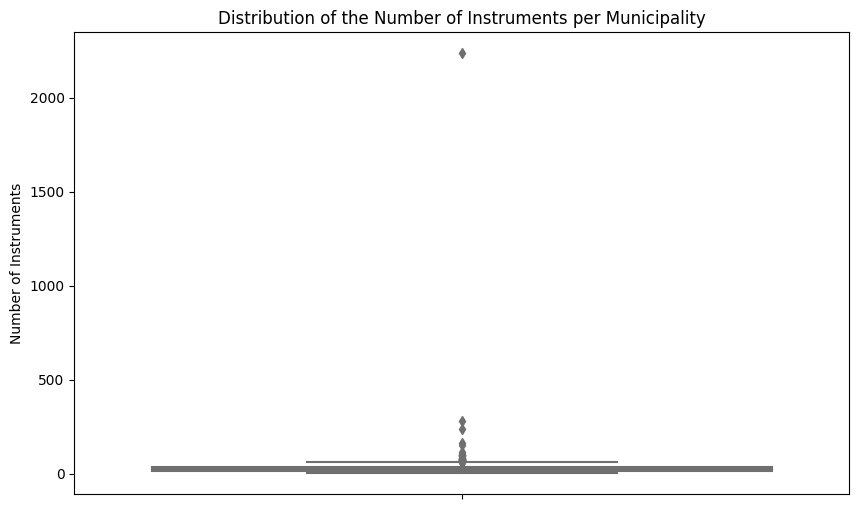

In [33]:
# Calculate the number of instruments per municipality
instruments_per_municipality = df['MUNICÍPIO'].value_counts()

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=instruments_per_municipality, color='skyblue')
plt.title('Distribution of the Number of Instruments per Municipality')
plt.ylabel('Number of Instruments')
plt.show()

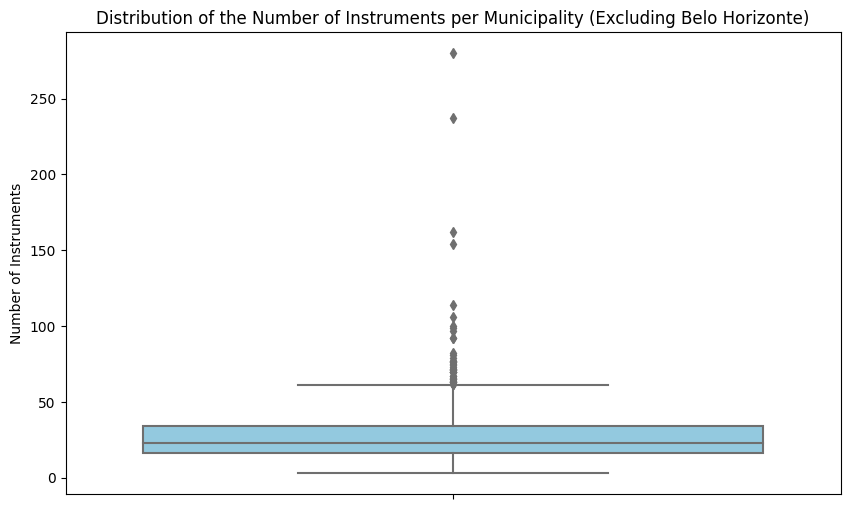

In [34]:
# Exclude 'BELO HORIZONTE' from the dataframe
df_no_bh = df[df['MUNICÍPIO'] != 'BELO HORIZONTE']

# Calculate the number of instruments per municipality
instruments_per_municipality_no_bh = df_no_bh['MUNICÍPIO'].value_counts()

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=instruments_per_municipality_no_bh, color='skyblue')
plt.title('Distribution of the Number of Instruments per Municipality (Excluding Belo Horizonte)')
plt.ylabel('Number of Instruments')
plt.show()

In [35]:
# Get the unique years in 'Ano Exercicio Inciso' column
unique_years = df['Ano Exercicio Inciso'].dropna().unique()

# Initialize dictionaries to store the top and bottom municipalities dataframes for each year
top_10_per_year = {}
bottom_10_per_year = {}

# Generate the top 10 and bottom 10 dataframes for each year
for year in unique_years:
    df_year = df[df['Ano Exercicio Inciso'] == year]
    
    top_10_per_year[year] = df_year['MUNICÍPIO'].value_counts().nlargest(10).reset_index().rename(columns={'index': 'Municipality', 'MUNICÍPIO': f'Number of Instruments ({int(year)})'})
    bottom_10_per_year[year] = df_year['MUNICÍPIO'].value_counts().nsmallest(10).reset_index().rename(columns={'index': 'Municipality', 'MUNICÍPIO': f'Number of Instruments ({int(year)})'})

top_10_per_year, bottom_10_per_year

({2019.0:   Number of Instruments (2019)  count
  0               BELO HORIZONTE    245
  1                     CONTAGEM     54
  2                MONTES CLAROS     40
  3                   UBERLANDIA     29
  4         CONSELHEIRO LAFAIETE     28
  5                      UBERABA     25
  6                  SETE LAGOAS     21
  7                 JUIZ DE FORA     18
  8                TEOFILO OTONI     18
  9                      IBIRITE     17,
  2020.0:   Number of Instruments (2020)  count
  0               BELO HORIZONTE    606
  1                MONTES CLAROS     42
  2                     CONTAGEM     27
  3                   DIAMANTINA     24
  4                     BOCAIUVA     21
  5                TEOFILO OTONI     21
  6                      NANUQUE     19
  7                      TIMOTEO     19
  8         CONSELHEIRO LAFAIETE     18
  9                  TRES PONTAS     17,
  2021.0:   Number of Instruments (2021)  count
  0               BELO HORIZONTE    495
  1           

In [36]:
# Load Minas Gerais shapefile
shape=r"C:\Users\T-Gamer\Desktop\Trabalho\SCGI\Emendas\MG_Municipios_2022.shp"
gdf = gpd.read_file(shape)

tipos=gdf.dtypes
print(tipos)
gdf.head()

CD_MUN        object
NM_MUN        object
SIGLA_UF      object
AREA_KM2     float64
geometry    geometry
dtype: object


CD_MUN               NM_MUN SIGLA_UF  AREA_KM2  \
0  3100104  Abadia dos Dourados       MG   880.461   
1  3100203               Abaeté       MG  1817.067   
2  3100302           Abre Campo       MG   470.551   
3  3100401              Acaiaca       MG   101.886   
4  3100500              Açucena       MG   815.422   

                                            geometry  
0  POLYGON ((-47.45335 -18.46925, -47.45341 -18.4...  
1  POLYGON ((-45.50026 -19.22585, -45.50024 -19.2...  
2  POLYGON ((-42.42074 -20.39718, -42.42076 -20.3...  
3  POLYGON ((-43.12231 -20.43351, -43.12239 -20.4...  
4  POLYGON ((-42.43777 -19.17542, -42.43781 -19.1...

In [37]:
# Convert 'COD IBGE' column in df to string
df['COD IBGE'] = df['COD IBGE'].astype(str).str.rstrip('.0')

# Check the data types again
cd_mun_dtype = gdf['CD_MUN'].dtype
cod_ibge_dtype_df_converted = df['COD IBGE'].dtype

cd_mun_dtype, cod_ibge_dtype_df_converted

(dtype('O'), dtype('O'))

In [38]:
# Grouping df by municipality and counting the number of instruments for each municipality
df_grouped = df.groupby('COD IBGE').size().reset_index(name='count_instruments')

# Checking the first few rows of df_grouped
df_grouped.head()

COD IBGE  count_instruments
0  3100104                 61
1  3100302                 11
2  3100401                 58
3    31005                 30
4  3100609                 14

In [39]:
# Check the data types of the columns 'CD_MUN' in gdf and 'COD IBGE' in df_grouped
cd_mun_dtype = gdf['CD_MUN'].dtype
cod_ibge_dtype = df_grouped['COD IBGE'].dtype

cd_mun_dtype, cod_ibge_dtype


(dtype('O'), dtype('O'))

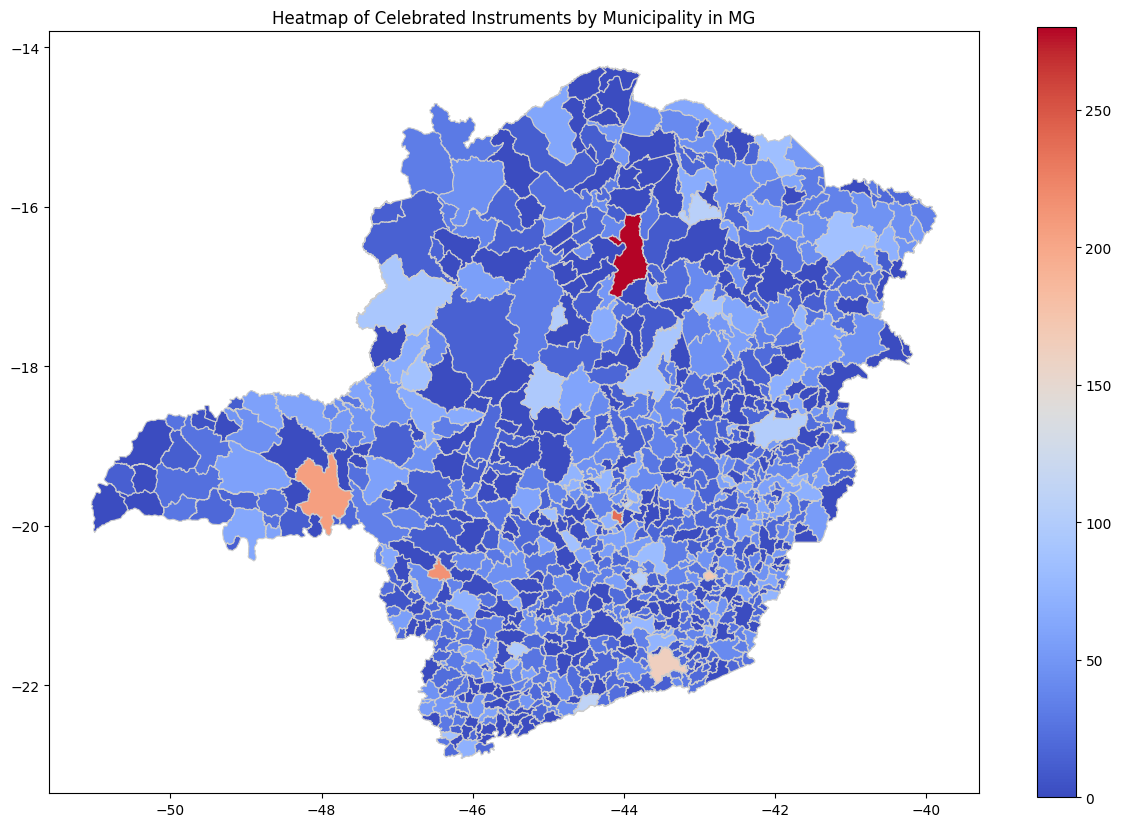

In [40]:
# Remove Belo Horizonte from the shapefile
gdf = gdf[gdf['NM_MUN'] != 'BELO HORIZONTE']

# Convert 'COD IBGE' column to string
df_grouped['COD IBGE'] = df_grouped['COD IBGE'].astype(str).str.rstrip('.0')  # Removing trailing ".0" from floats

# Merge the shapefile with the aggregated dataframe using the IBGE code
merged_gdf = gdf.merge(df_grouped, left_on='CD_MUN', right_on='COD IBGE', how='left').fillna(0)

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='count_instruments', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Heatmap of Celebrated Instruments by Municipality in MG')
plt.show()





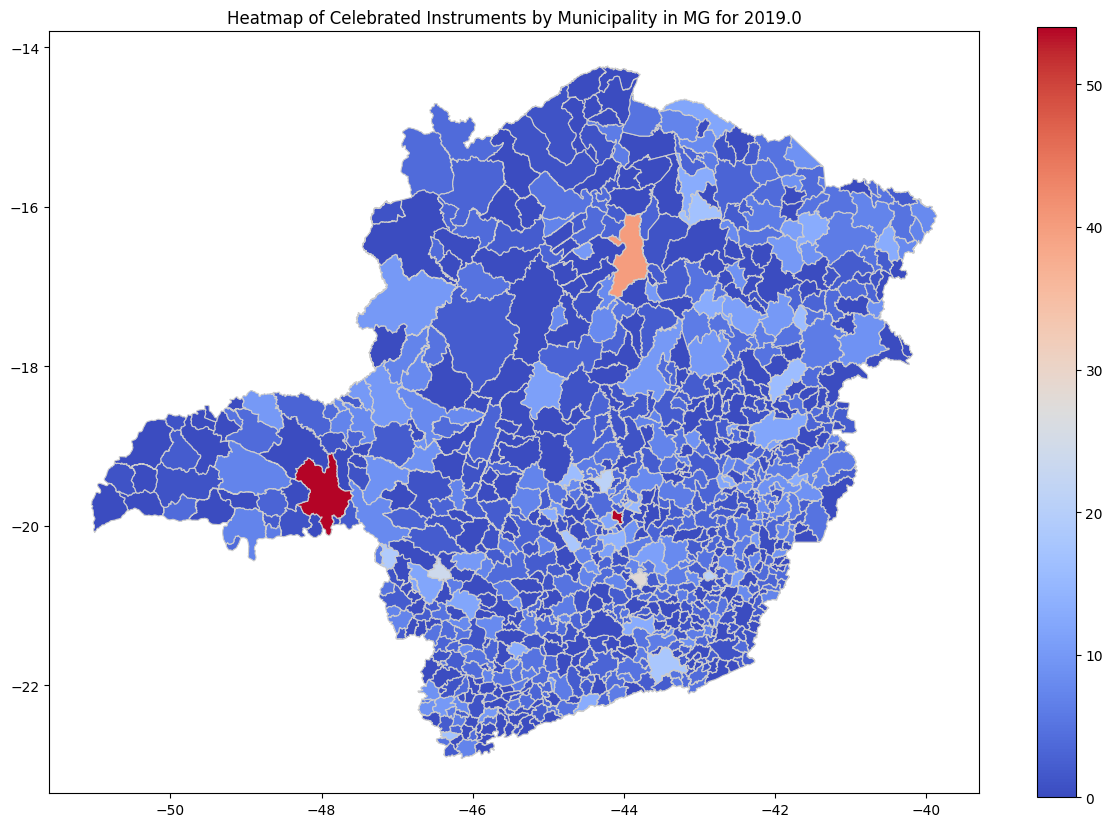

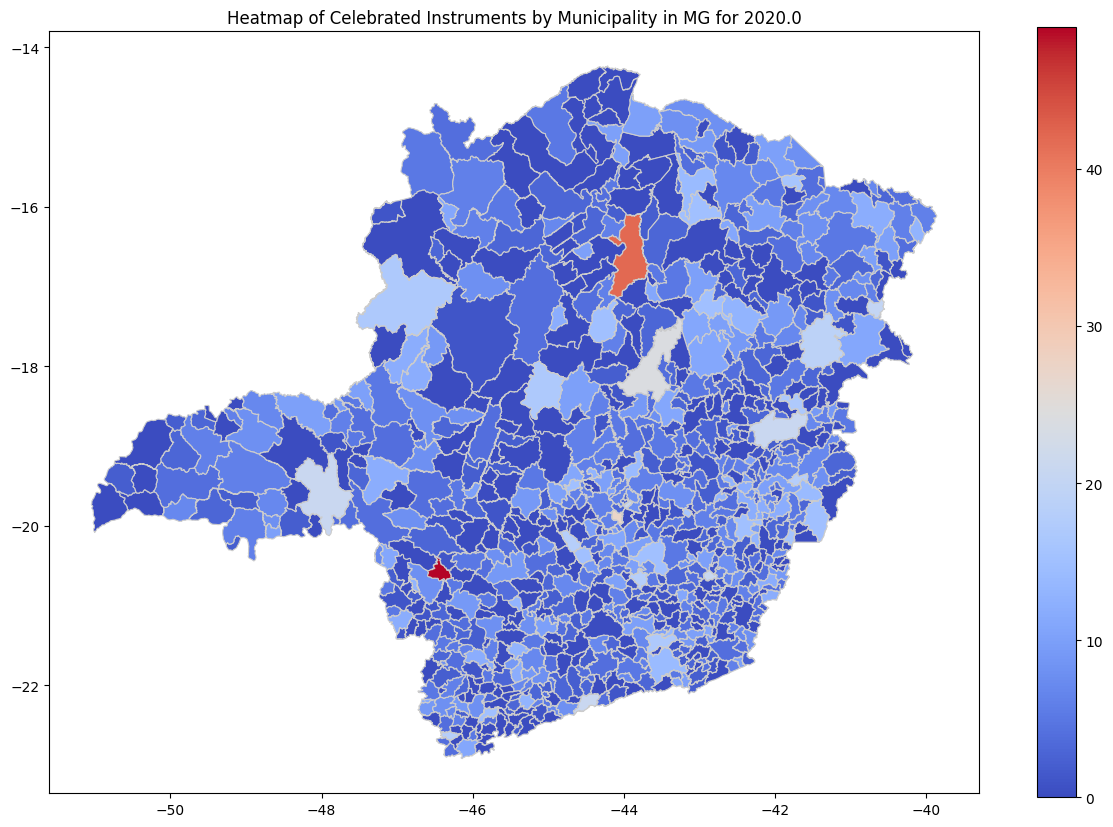

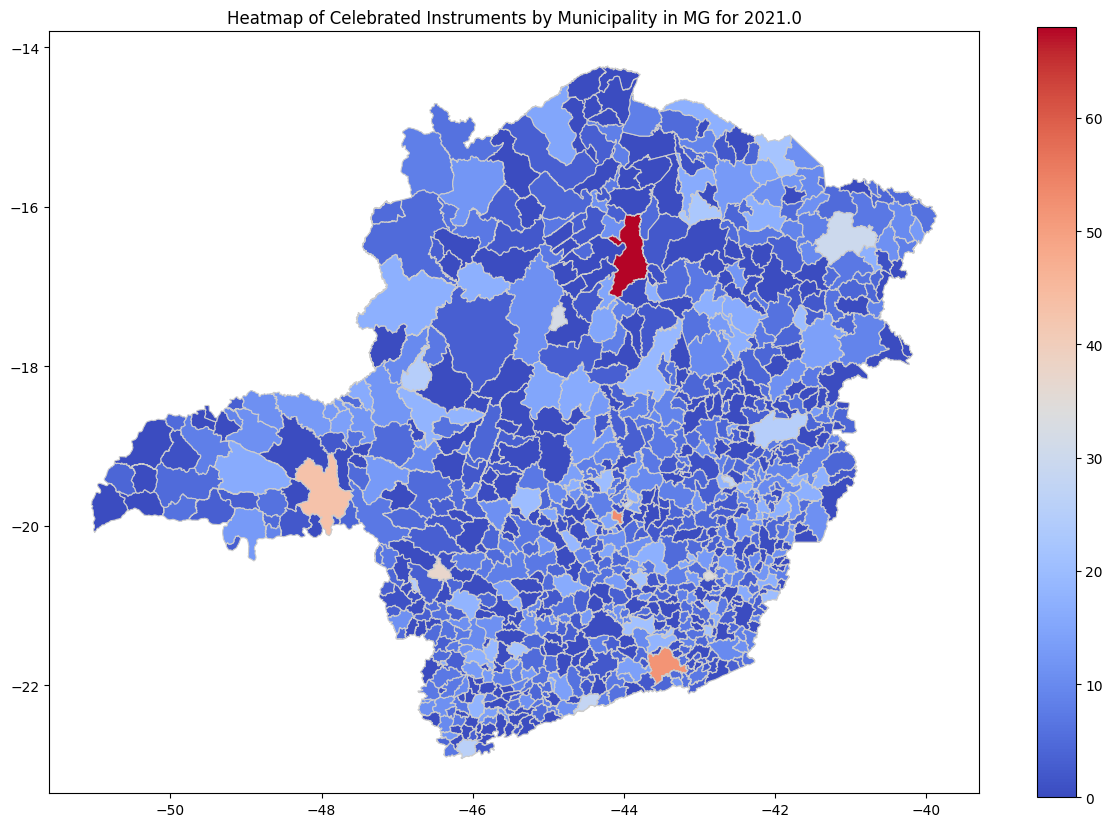

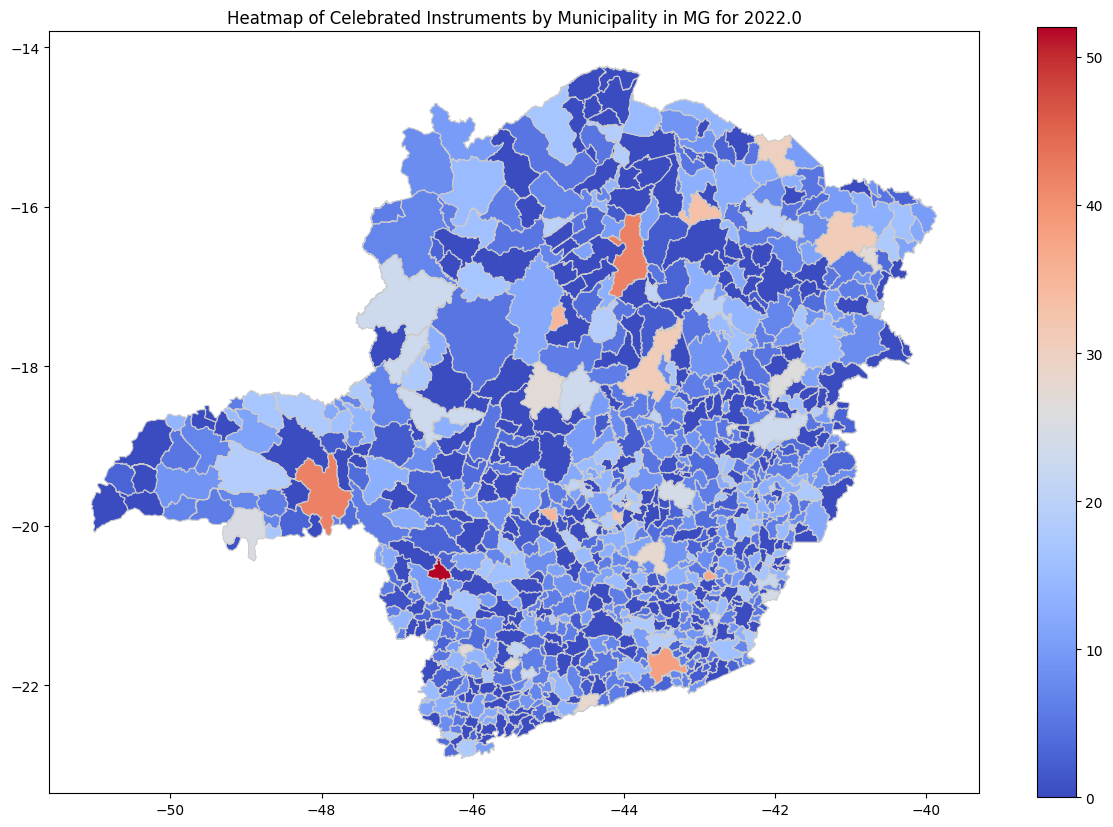

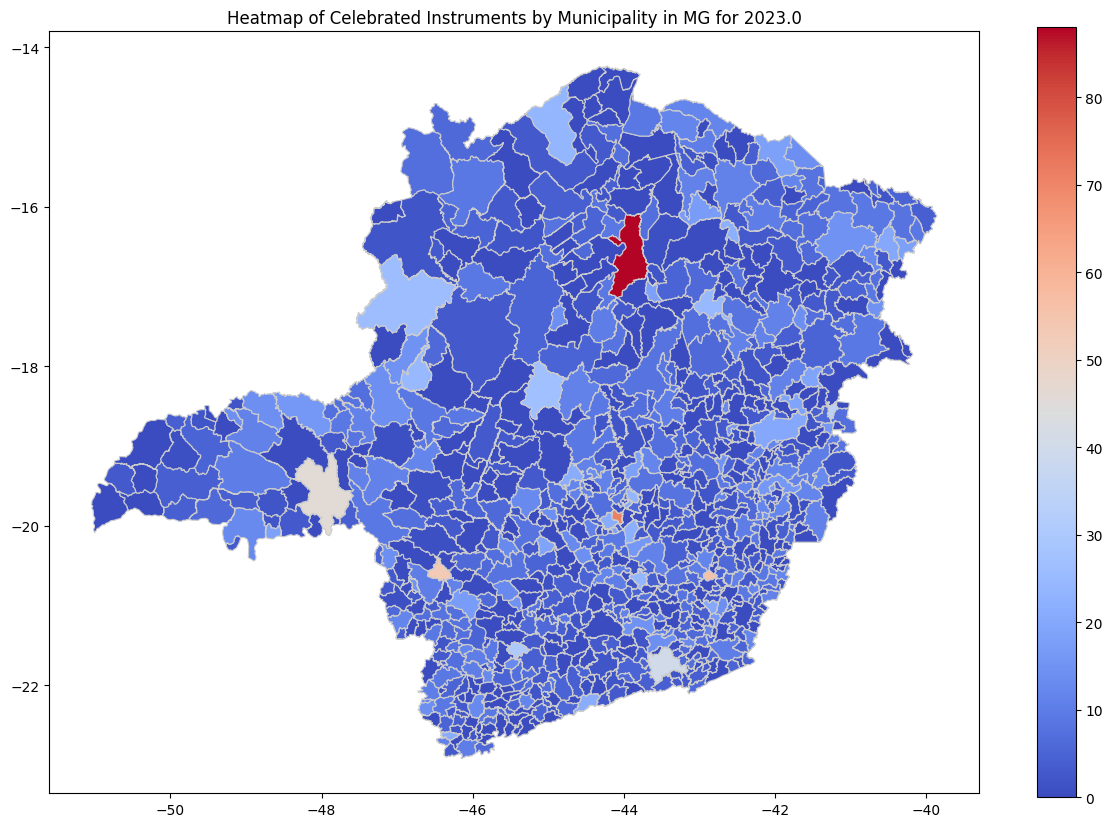

In [41]:
# Remove Belo Horizonte from the shapefile
gdf = gdf[gdf['NM_MUN'] != 'BELO HORIZONTE']

# Iterate over each unique year
for year in df['Ano Exercicio Inciso'].unique():
    # Filter dataframe for the specific year
    df_year = df[df['Ano Exercicio Inciso'] == year]
    
    # Aggregate by municipality
    df_grouped_year = df_year.groupby('COD IBGE').size().reset_index(name='count_instruments')
    
    # Convert 'COD IBGE' column to string
    df_grouped_year['COD IBGE'] = df_grouped_year['COD IBGE'].astype(str).str.rstrip('.0')
    
    # Merge with the shapefile
    merged_gdf_year = gdf.merge(df_grouped_year, left_on='CD_MUN', right_on='COD IBGE', how='left').fillna(0)
    
    # Plot the heatmap
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_gdf_year.plot(column='count_instruments', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Heatmap of Celebrated Instruments by Municipality in MG for {year}')
    plt.show()


In [42]:
# Aggregate the dataframe by municipality to get the count of instruments
df_aggregated = df.groupby('MUNICÍPIO').size().reset_index(name='count_instruments')

# Sort the aggregated dataframe by count_instruments in descending order
df_sorted = df_aggregated.sort_values(by='count_instruments', ascending=False)

print(df_sorted)


                     MUNICÍPIO  count_instruments
65              BELO HORIZONTE               2237
500              MONTES CLAROS                280
205                   CONTAGEM                237
418               JUIZ DE FORA                162
805              TEOFILO OTONI                154
..                         ...                ...
832              VARGEM BONITA                  5
282                FARIA LEMOS                  5
27             AMPARO DO SERRA                  5
721  SAO GONCALO DO RIO ABAIXO                  3
699     SANTO ANTONIO DO GRAMA                  3

[853 rows x 2 columns]


In [43]:
# Create a dictionary to hold results for each year
municipalities_without_instruments = {}

# Iterate over each unique year
for year in df['Ano Exercicio Inciso'].unique():
    # Filter dataframe for the specific year
    df_year = df[df['Ano Exercicio Inciso'] == year]
    
    # List of municipalities that had instruments for that year
    municipalities_with_instruments = df_year['MUNICÍPIO'].unique()
    
    # Find municipalities without instruments by using set difference
    municipalities_without = set(df['MUNICÍPIO'].unique()) - set(municipalities_with_instruments)
    
    # Add to the results dictionary
    municipalities_without_instruments[year] = list(municipalities_without)

# Convert the results dictionary to a dataframe for better visualization
df_municipalities_without = pd.DataFrame.from_dict(municipalities_without_instruments, orient='index').transpose()

# Set Pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Display the dataframe
df_municipalities_without


2019.0                       2020.0  \
0             CONGONHAS DO NORTE                       ARAPUA   
1                         ARAPUA                    ARACITABA   
2    CONCEICAO DA BARRA DE MINAS  CONCEICAO DA BARRA DE MINAS   
3                    FREI GASPAR             BOCAINA DE MINAS   
4                      ITUIUTABA                CASCALHO RICO   
5                CAPITAO ANDRADE                      PEQUERI   
6                  CASCALHO RICO                  PIRANGUINHO   
7               COMENDADOR GOMES                    TEIXEIRAS   
8                    TUMIRITINGA                    JAPARAIBA   
9                          MOEDA    SAO GONCALO DO RIO ABAIXO   
10                        CALDAS               SENADOR AMARAL   
11                        REDUTO          BELA VISTA DE MINAS   
12                      SERRANOS                        MOEMA   
13          SAO JOSE DA VARGINHA                      COIMBRA   
14                       MINDURI            DORES DE GUANHAES   
15                    IGARATINGA                  BARRA LONGA   
16                         PALMA                     IGUATAMA   
17               AMPARO DO SERRA                      CHIADOR   
18           SANTA CRUZ DE MINAS      SANTO ANTONIO DO RETIRO   
19                 AGUA COMPRIDA          BOM JARDIM DE MINAS   
20  SANTO ANTONIO DO AVENTUREIRO             SENHORA DO PORTO   
21                MORRO DA GARCA                      ARAUJOS   
22                   TURVOLANDIA             ROCHEDO DE MINAS   
23                       PECANHA                    ALBERTINA   
24                      JESUANIA          SAO TOMAS DE AQUINO   
25                    FUNILANDIA               UNIAO DE MINAS   
26                   CATAS ALTAS                       SARDOA   
27                 VARGEM BONITA                      ITURAMA   
28                         PAIVA                 DELFINOPOLIS   
29             SAO JOAO DA LAGOA                CORREGO FUNDO   
30                       COIMBRA                     LASSANCE   
31                    FERVEDOURO                BELMIRO BRAGA   
32       SANTO ANTONIO DO ITAMBE                         None   
33                   FARIA LEMOS                         None   
34                         IJACI                         None   
35                         BICAS                         None   
36                         DELTA                         None   
37           SAO JOAO DO ORIENTE                         None   
38    SAO SEBASTIAO DO RIO VERDE                         None   
39         PIEDADE DO RIO GRANDE                         None   
40                   DORESOPOLIS                         None   
41        SAO JOAO DO MANTENINHA                         None   
42                     PAINEIRAS                         None   
43                       VIEIRAS                         None   
44              ROCHEDO DE MINAS                         None   
45                     RIO ACIMA                         None   
46               LAGOA DOS PATOS                         None   
47            FORTALEZA DE MINAS                         None   
48                     ITAPAGIPE                         None   
49               AUGUSTO DE LIMA                         None   
50          SAO PEDRO DOS FERROS                         None   
51                UNIAO DE MINAS                         None   
52                  VOLTA GRANDE                         None   
53         SANTA CRUZ DE SALINAS                         None   
54                        SARDOA                         None   
55                      ORIZANIA                         None   
56              FORTUNA DE MINAS                         None   
57                     LIBERDADE                         None   
58             ENGENHEIRO CALDAS                         None   
59                 SILVIANOPOLIS                         None   
60                  DELFINOPOLIS                         None

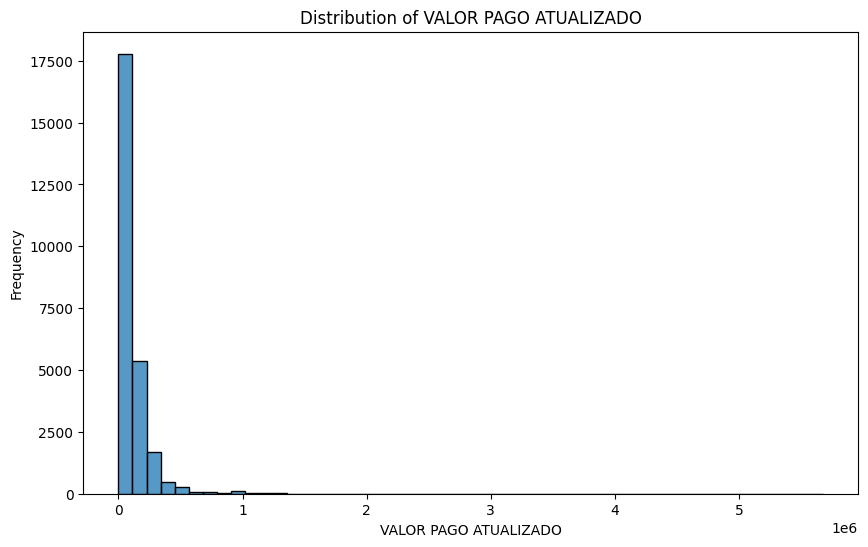

In [44]:
# Plot the distribution of 'VALOR PAGO ATUALIZADO'
plt.figure(figsize=(10, 6))
sns.histplot(df['VALOR PAGO ATUALIZADO'], bins=50, kde=False)
plt.title('Distribution of VALOR PAGO ATUALIZADO')
plt.xlabel('VALOR PAGO ATUALIZADO')
plt.ylabel('Frequency')
plt.show()

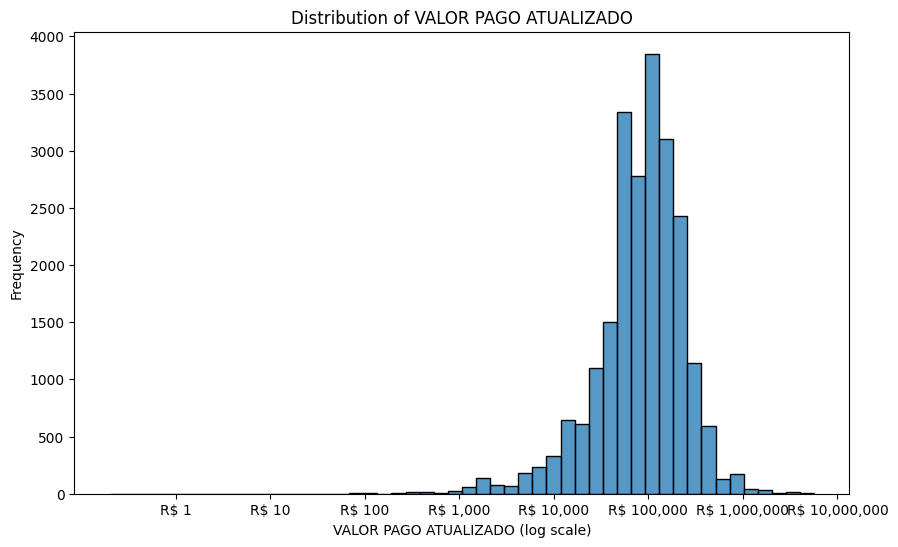

In [45]:
# Plot the distribution of 'VALOR PAGO ATUALIZADO' with a logarithmic scale
plt.figure(figsize=(10, 6))
sns.histplot(df[df['VALOR PAGO ATUALIZADO'] > 0]['VALOR PAGO ATUALIZADO'], log_scale=True, bins=50)
plt.title('Distribution of VALOR PAGO ATUALIZADO')
plt.xlabel('VALOR PAGO ATUALIZADO (log scale)')
plt.ylabel('Frequency')

# Format x-ticks to display in terms of R$
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
labels = ['R$ {:,.0f}'.format(x) for x in ticks]
plt.xticks(ticks, labels)

plt.show()

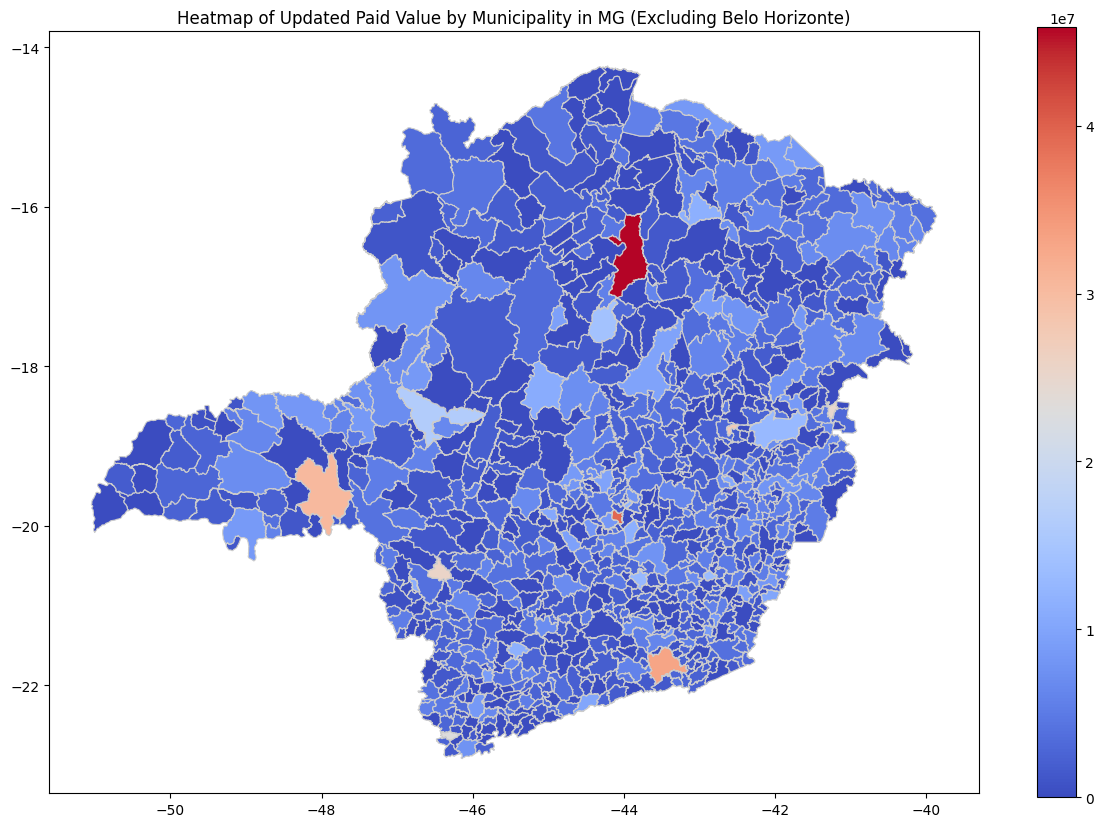

In [46]:
# 1. Load the shapefile
gdf = gpd.read_file(shape)

# Exclude Belo Horizonte from the shapefile data
gdf = gdf[gdf['NM_MUN'] != 'BELO HORIZONTE']

# 2. Aggregate the dataframe by municipality to get the sum of "VALOR PAGO ATUALIZADO"
df_aggregated_value = df.groupby('COD IBGE').agg({'VALOR PAGO ATUALIZADO': 'sum'}).reset_index()

# Convert 'COD IBGE' column to string for merging
df_aggregated_value['COD IBGE'] = df_aggregated_value['COD IBGE'].astype(str).str.rstrip('.0')

# 3. Merge the shapefile with the aggregated dataframe using the IBGE code
merged_gdf_value = gdf.merge(df_aggregated_value, left_on='CD_MUN', right_on='COD IBGE', how='left').fillna(0)

# 4. Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf_value.plot(column='VALOR PAGO ATUALIZADO', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Heatmap of Updated Paid Value by Municipality in MG (Excluding Belo Horizonte)')
plt.show()



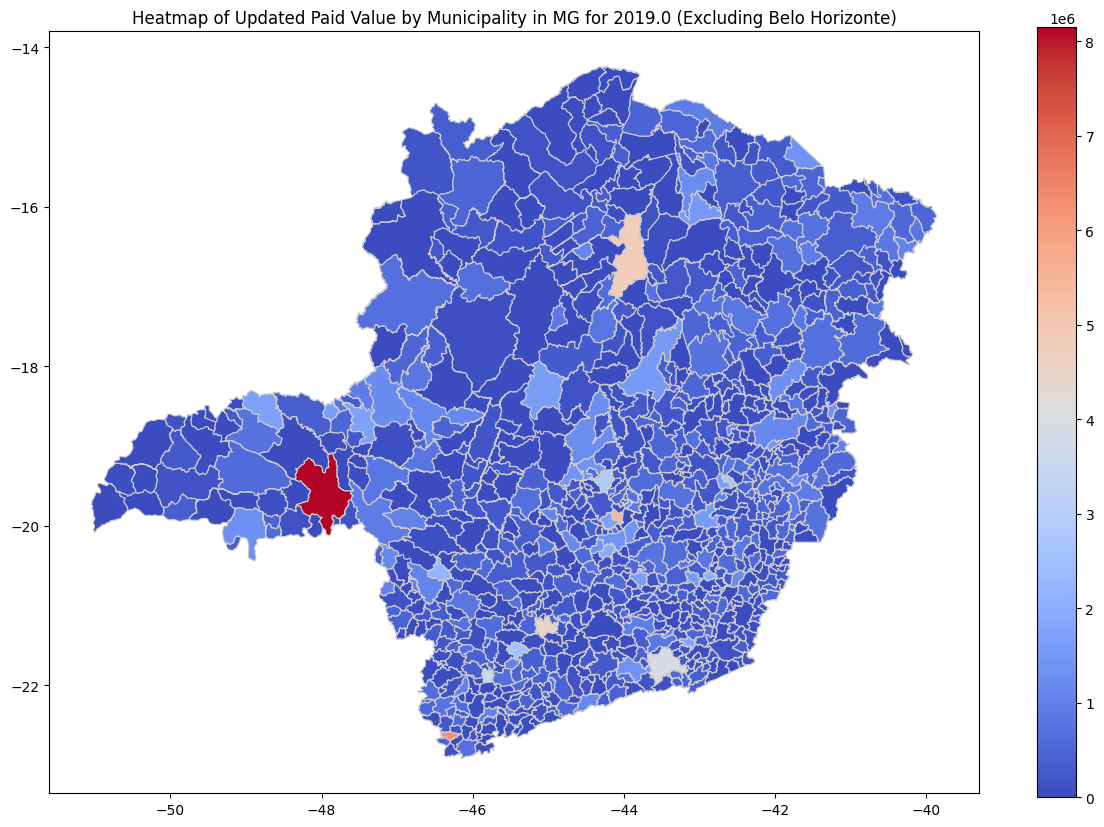

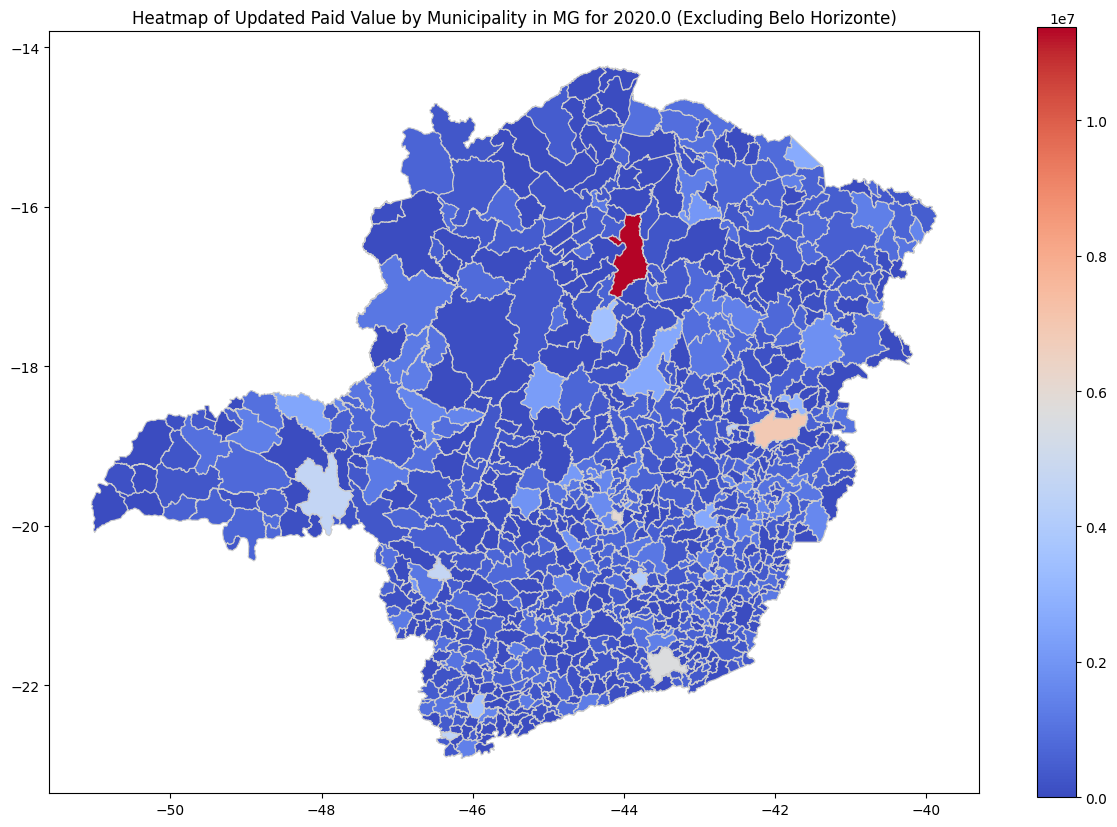

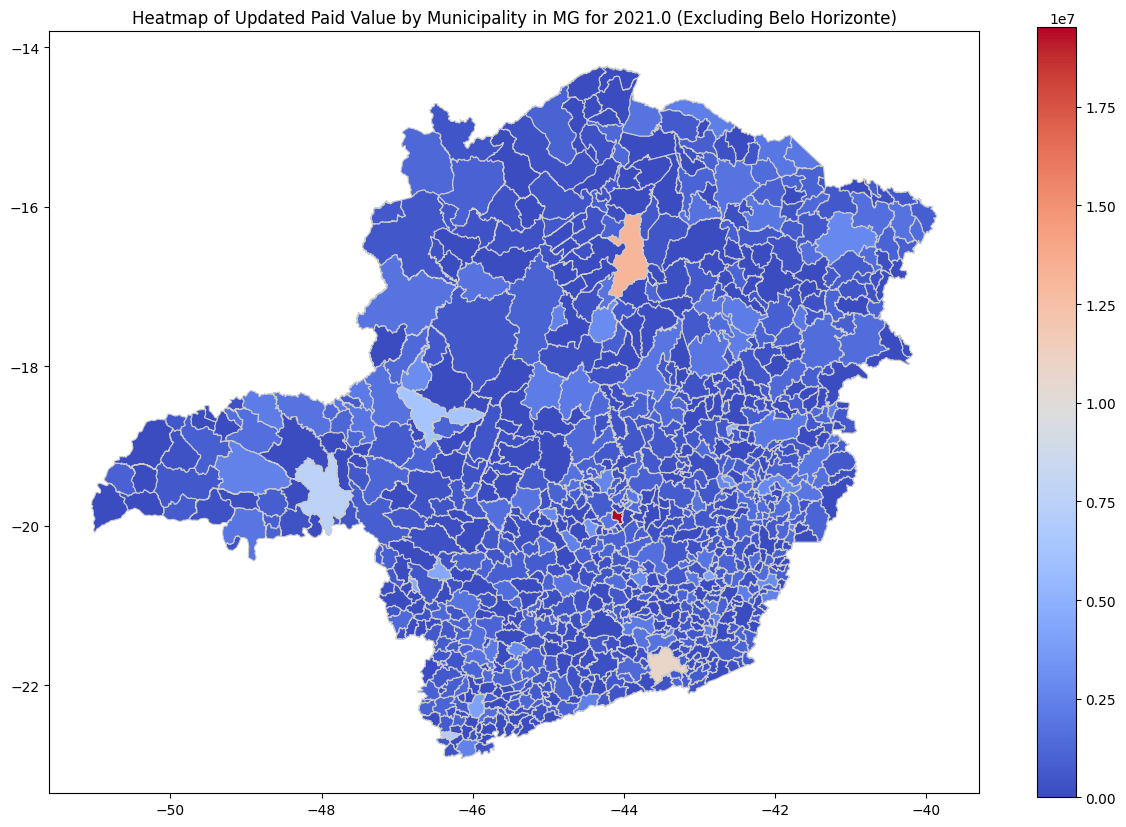

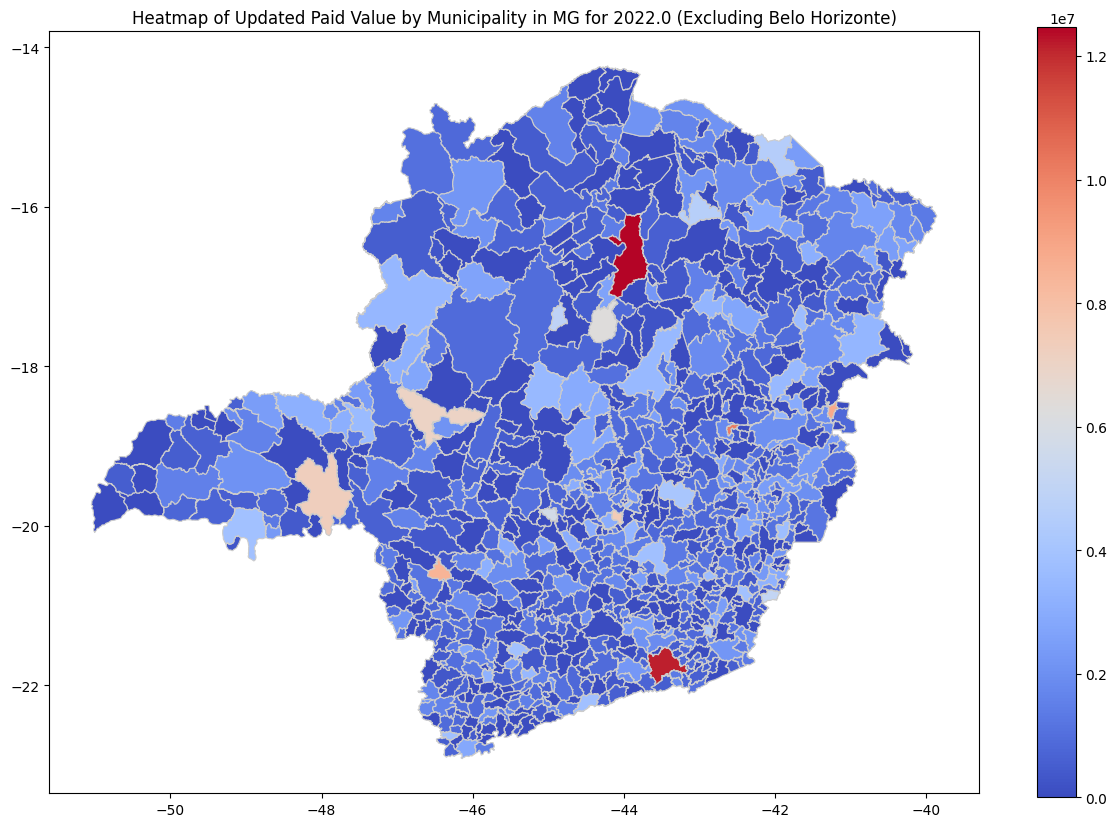

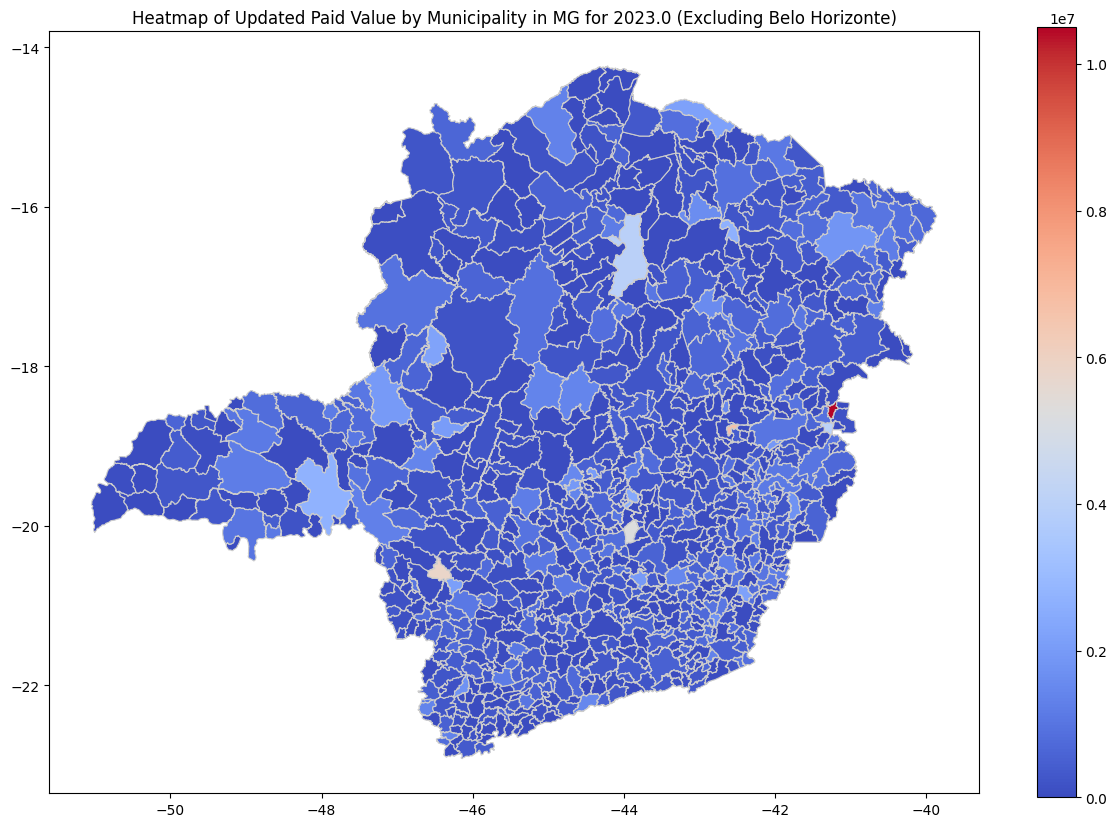

In [47]:
# 1. Load the shapefile
gdf = gpd.read_file(shape)

# Exclude Belo Horizonte from the shapefile data
gdf = gdf[gdf['NM_MUN'] != 'BELO HORIZONTE']

# Iterate over each unique year in the "Ano Exercicio Inciso" column
for year in df['Ano Exercicio Inciso'].unique():
    # Filter dataframe for the specific year
    df_year = df[df['Ano Exercicio Inciso'] == year]
    
    # Aggregate by municipality to get the sum of "VALOR PAGO ATUALIZADO"
    df_grouped_year = df_year.groupby('COD IBGE').agg({'VALOR PAGO ATUALIZADO': 'sum'}).reset_index()
    
    # Convert 'COD IBGE' column to string for merging
    df_grouped_year['COD IBGE'] = df_grouped_year['COD IBGE'].astype(str).str.rstrip('.0')
    
    # Merge with the shapefile
    merged_gdf_year = gdf.merge(df_grouped_year, left_on='CD_MUN', right_on='COD IBGE', how='left').fillna(0)
    
    # Plot the heatmap
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_gdf_year.plot(column='VALOR PAGO ATUALIZADO', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.set_title(f'Heatmap of Updated Paid Value by Municipality in MG for {year} (Excluding Belo Horizonte)')
    plt.show()


In [53]:
pd.set_option('display.float_format', 'R$ {:.2f}'.format)


In [54]:
# Aggregate the dataframe by municipality to get the sum of "VALOR PAGO ATUALIZADO"
df_value_sorted = df.groupby('MUNICÍPIO').agg({'VALOR PAGO ATUALIZADO': 'sum'}).reset_index()

# Sort the dataframe by "VALOR PAGO ATUALIZADO" in descending order
df_value_sorted = df_value_sorted.sort_values(by='VALOR PAGO ATUALIZADO', ascending=False)

print(df_value_sorted)

                          MUNICÍPIO  VALOR PAGO ATUALIZADO
65                   BELO HORIZONTE        R$ 225762766.56
500                   MONTES CLAROS         R$ 45854121.15
205                        CONTAGEM         R$ 39492523.21
418                    JUIZ DE FORA         R$ 32978063.27
247                     DIVINOPOLIS         R$ 27412534.95
361                      ITABIRINHA         R$ 24807870.64
506                          MURIAE         R$ 19287906.64
460                         MARILAC         R$ 18247443.30
823                         UBERABA         R$ 16054851.96
824                      UBERLANDIA         R$ 14332767.80
265               ENGENHEIRO CALDAS         R$ 13687678.00
561                  PATOS DE MINAS         R$ 13686370.42
202            CONSELHEIRO LAFAIETE         R$ 12887919.94
165                      CATAGUASES         R$ 12627528.28
805                   TEOFILO OTONI         R$ 11304715.82
382                          ITAUNA         R$ 11182431.

In [49]:
# Calculate the value per citizen by dividing "VALOR PAGO ATUALIZADO" by "População Município"
# Note: We use 'first' in the aggregation to ensure that the population value isn't summed across rows.
df_value_per_citizen = df.groupby('MUNICÍPIO').agg({'VALOR PAGO ATUALIZADO': 'sum', 
                                                    'População Município': 'first', 
                                                    'COD IBGE': 'first'}).reset_index()

df_value_per_citizen['Valor por Cidadão'] = df_value_per_citizen['VALOR PAGO ATUALIZADO'] / df_value_per_citizen['População Município']

# Sort the dataframe by "Valor por Cidadão" in descending order
df_value_per_citizen_sorted = df_value_per_citizen[['MUNICÍPIO', 'COD IBGE', 'Valor por Cidadão']].sort_values(by='Valor por Cidadão', ascending=False)

df_value_per_citizen_sorted.head()



MUNICÍPIO COD IBGE  Valor por Cidadão
460       MARILAC    31401        4473.509022
517    NOVA BELEM  3144656        2287.186828
520   NOVA MODICA  3144805        2205.263529
361    ITABIRINHA  3131802        2131.809800
220  CORREGO NOVO  3119955        1860.119048

C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_28628\3307615756.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggregated_value_per_citizen['COD IBGE'] = df_aggregated_value_per_citizen['COD IBGE'].astype(str).str.rstrip('.0')


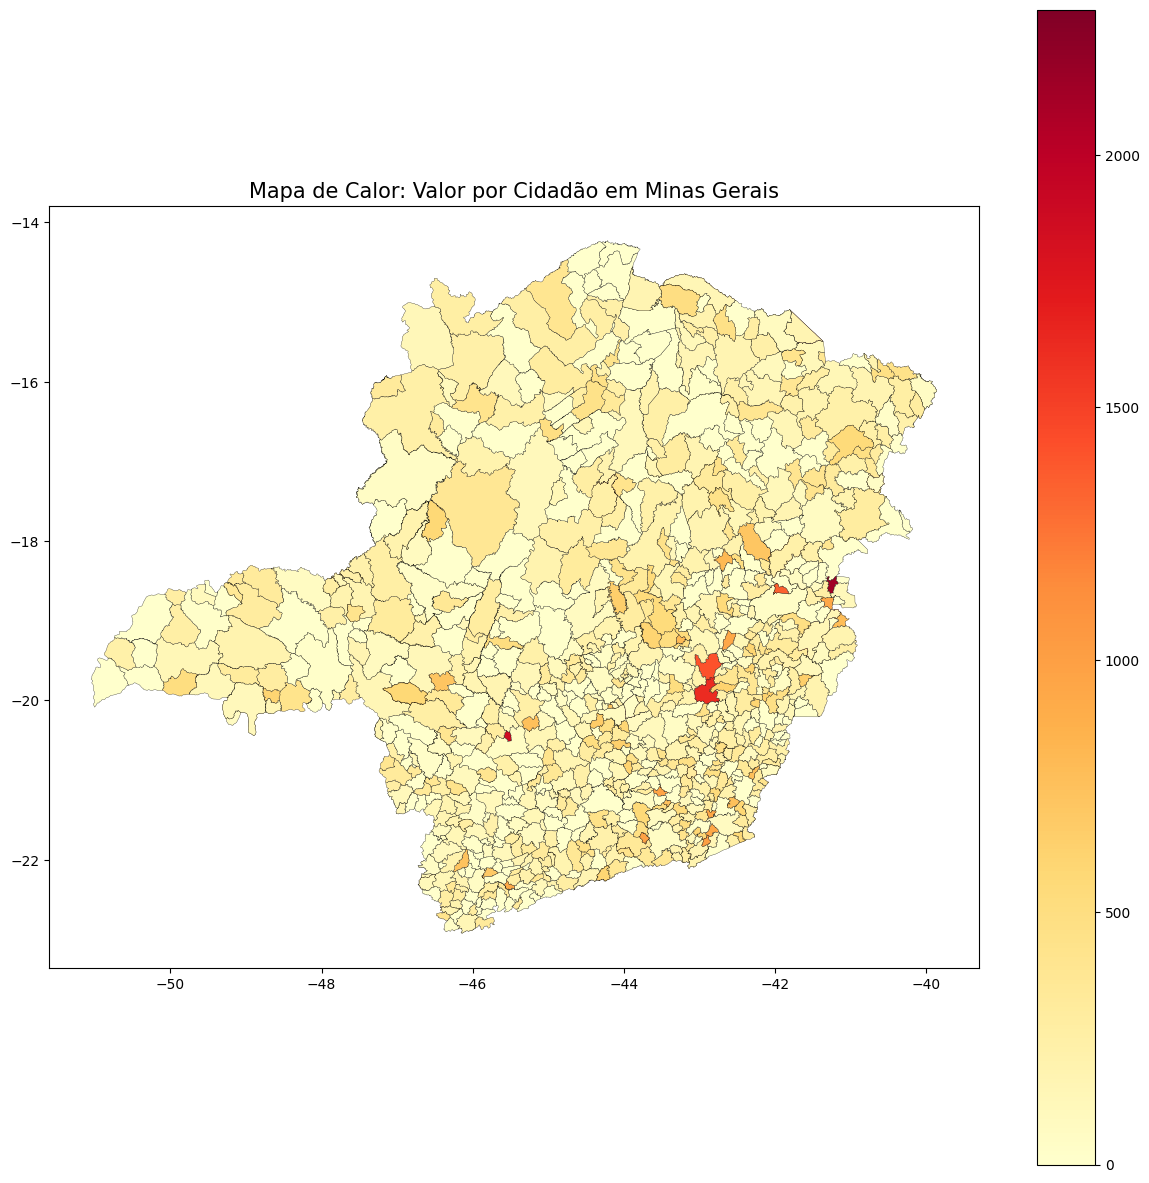

In [52]:
# 1. Load the shapefile
gdf = gpd.read_file(shape)

# 2. Aggregate the dataframe by IBGE code to get "Valor por Cidadão"
df_aggregated_value_per_citizen = df_value_per_citizen_sorted[['COD IBGE', 'Valor por Cidadão']]

# Convert 'COD IBGE' column to string for merging
df_aggregated_value_per_citizen['COD IBGE'] = df_aggregated_value_per_citizen['COD IBGE'].astype(str).str.rstrip('.0')

# 3. Merge the shapefile with the aggregated dataframe using the IBGE code
merged_gdf_value_per_citizen = gdf.merge(df_aggregated_value_per_citizen, left_on='CD_MUN', right_on='COD IBGE', how='left').fillna(0)

# Plotting heatmap without natural breaks classification and without adjusting legend
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_gdf_value_per_citizen.plot(column='Valor por Cidadão', cmap='YlOrRd', legend=True, ax=ax, edgecolor='black', linewidth=0.2)
ax.set_title('Mapa de Calor: Valor por Cidadão em Minas Gerais', fontdict={'fontsize': '15', 'fontweight' : '3'})

plt.show()


